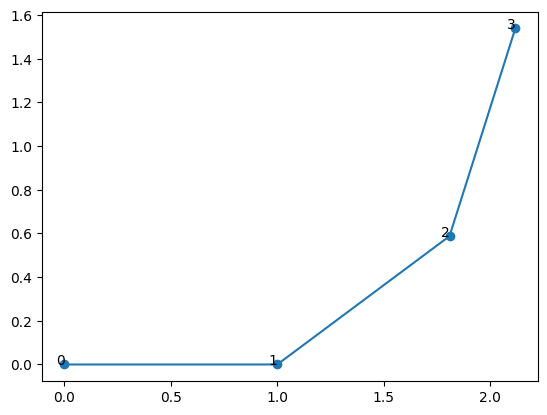

In [19]:
import numpy as np
import matplotlib.pyplot as plt

origin = np.array([0, 0])  # 点0の座標

# rand0-1 * (SUM - min) + min それぞれ生成
randoms = [1, 1, 1]
# 0~1
t = [0.2, 0.2]

# 点の座標
p1 = np.array([origin[0] + randoms[0], origin[1]])
p2 = np.array([p1[0] + randoms[1] * np.cos(np.pi * t[0]), p1[1] + randoms[1] * np.sin(np.pi * t[0])])
p3 = np.array([p2[0] + randoms[2] * np.cos(np.pi * (t[0] + t[1])), p2[1] + randoms[2] * np.sin(np.pi * (t[0] + t[1]))])
points = [origin, p1, p2, p3]

v01 = p1 - origin  # 点0→点1へのベクトル
v23 = p3 - p2  # 点2→点3へのベクトル
vecs = [v01, v23]

# 辺0-1と2-3が交点をもつかどうかを判定する
result = np.linalg.solve(np.vstack((vecs[0], -vecs[1])).T, p2 - origin)
ss = result[0]  # 判定条件ssが0と1の間にあり
tt = result[1]  # かつttが0と1の間にあると辺0-1と2-3は交わる

cos_theta = np.dot(vecs[0], vecs[1]) / (np.linalg.norm(vecs[0]) * np.linalg.norm(vecs[1]))  # 辺01と辺23が平行か否かを判定するための値
cos_pi = 0.999

def isparallel(cos_theta):
    if np.abs(cos_theta) >= cos_pi:
        return True
    else:
        return False

def printresult(s, t):
    if np.linalg.norm(origin - points[3]) < 0.2:
        print("False0-3")
        return
    if np.linalg.norm(origin - points[2]) < 0.2:
        print("False0-2")
        return
    if np.linalg.norm(points[1] - points[3]) < 0.2:
        print("False1-3")
        return
    if 0 < s < 1 and 0 < t < 1:
        print("crossed")
        return
    
    plt.figure()
    plt.plot(*zip(*points), marker='o')
    for i, p in enumerate(points):
        plt.text(p[0], p[1], str(i), ha='right')
    plt.show()

if isparallel(cos_theta):
    ss = 10
    tt = 10
printresult(ss, tt)
